## Chargement des modules 

In [27]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chargement de la base de données 

In [6]:
data = pd.read_excel('./Datasets/dataset.xlsx')
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = data.copy()

## Analyse des variables

In [8]:
df.shape

(5644, 111)

In [13]:
# df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

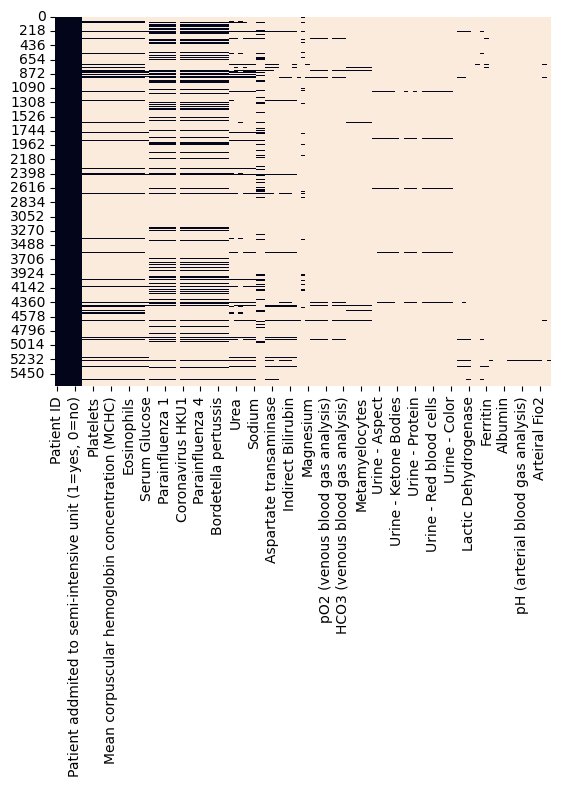

In [15]:
sns.heatmap(df.isna(), cbar = False)

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
Partial thromboplastin time (PTT)                        1.0
Prothrombin time (PT), Activity                          1.0
D-Dimer                                                  1.0
                                                        ... 
SARS-Cov-2 exam result                                   0.0
Patient age quantile                                     0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to intensive care unit (1=yes, 0=no)    0.0
Patient ID                                               0.0
Length: 111, dtype: float64

In [18]:
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

<Axes: >

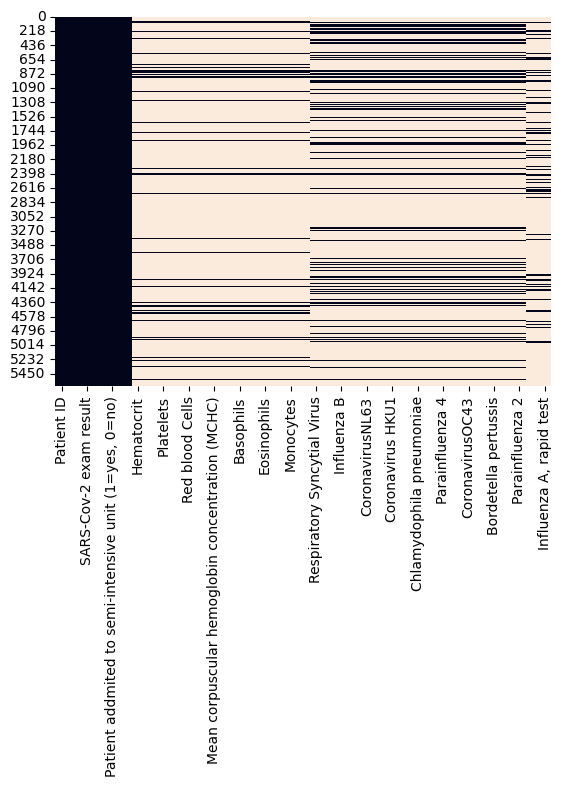

In [20]:
sns.heatmap(df.isna(), cbar = False)

In [21]:
df = df.drop('Patient ID', axis = 1)

### Visualisation de target 

In [23]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

#### histogramme des var continues 

/var/folders/w1/ms_htgr930d8f68343jr6spm0000gn/T/ipykernel_93781/101771657.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

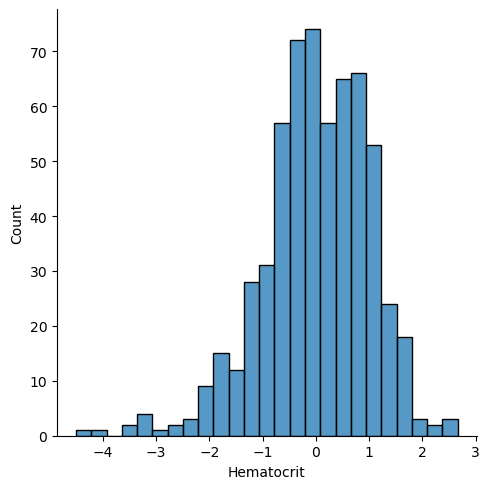

<Figure size 640x480 with 0 Axes>

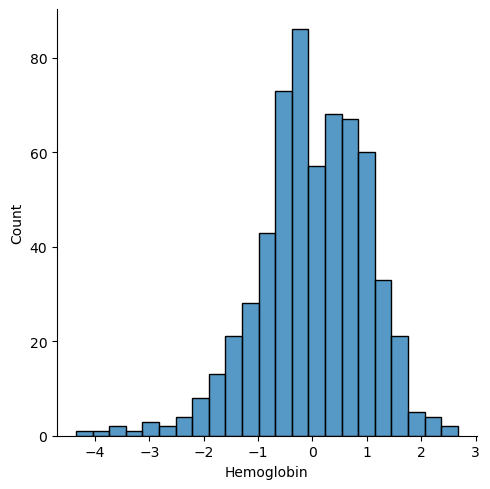

<Figure size 640x480 with 0 Axes>

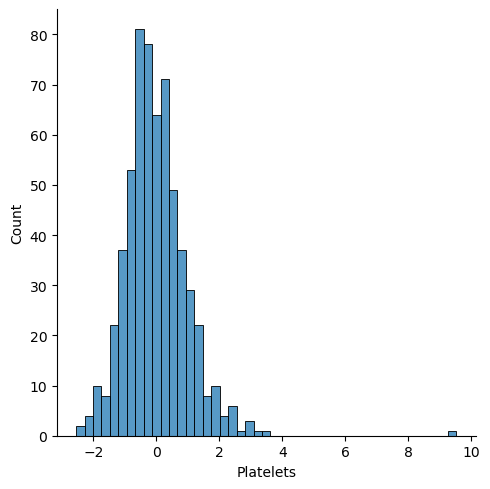

<Figure size 640x480 with 0 Axes>

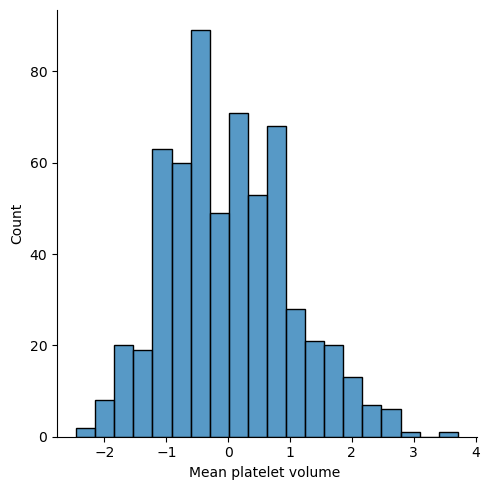

<Figure size 640x480 with 0 Axes>

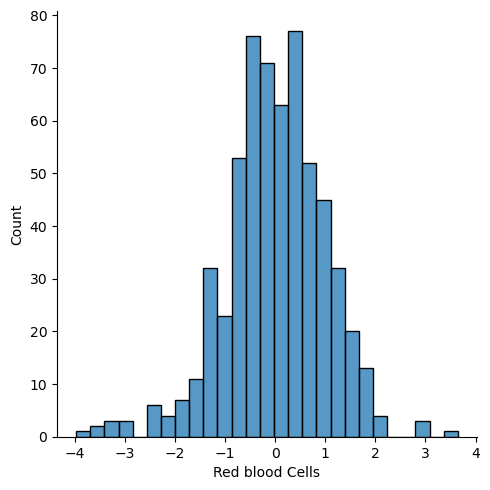

<Figure size 640x480 with 0 Axes>

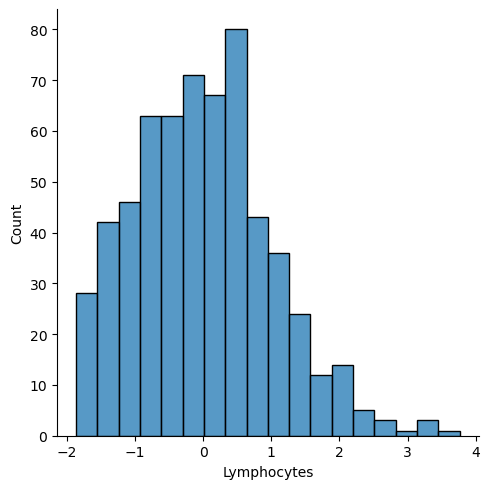

<Figure size 640x480 with 0 Axes>

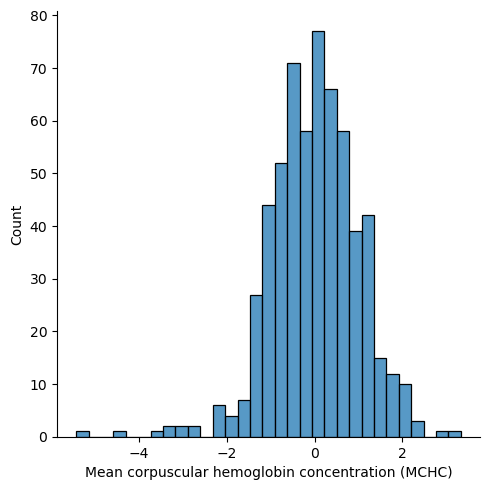

<Figure size 640x480 with 0 Axes>

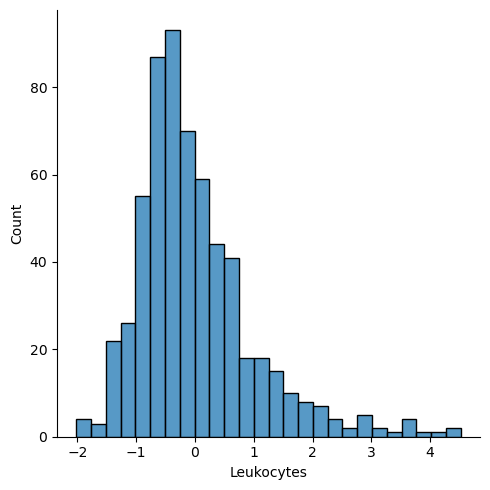

<Figure size 640x480 with 0 Axes>

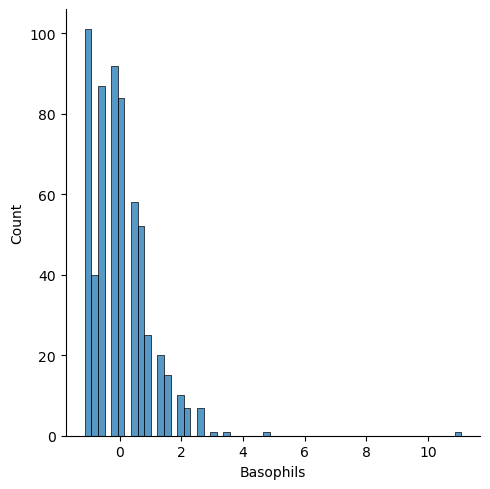

<Figure size 640x480 with 0 Axes>

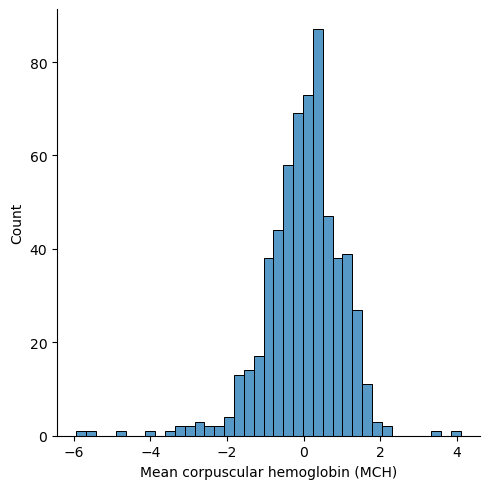

<Figure size 640x480 with 0 Axes>

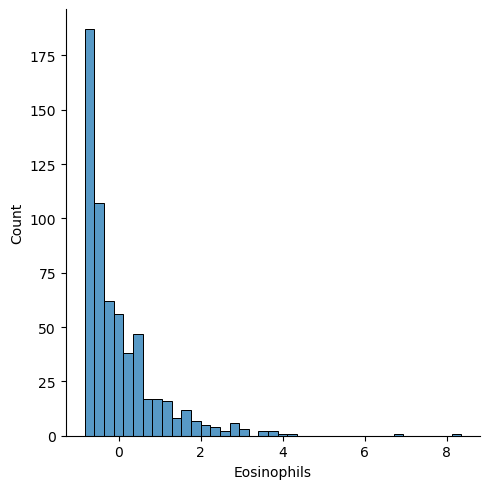

<Figure size 640x480 with 0 Axes>

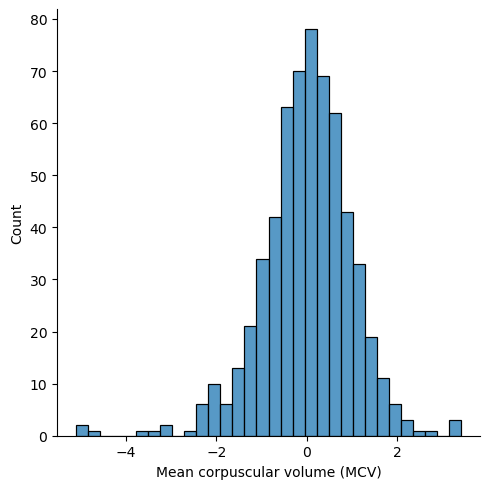

<Figure size 640x480 with 0 Axes>

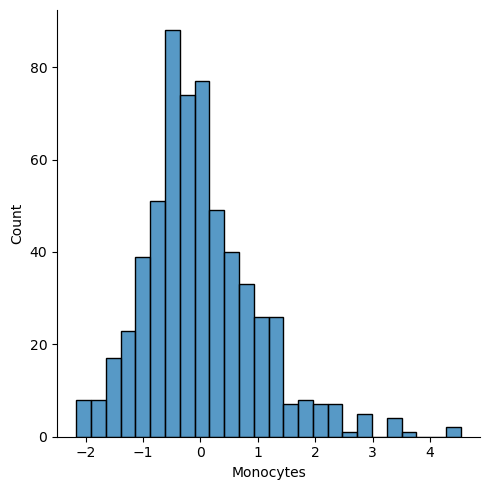

<Figure size 640x480 with 0 Axes>

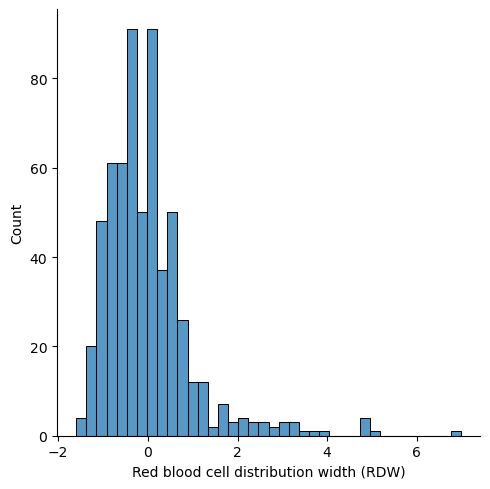

In [30]:
for col in df.select_dtypes('float') : 
    plt.figure()
    sns.displot(df[col])

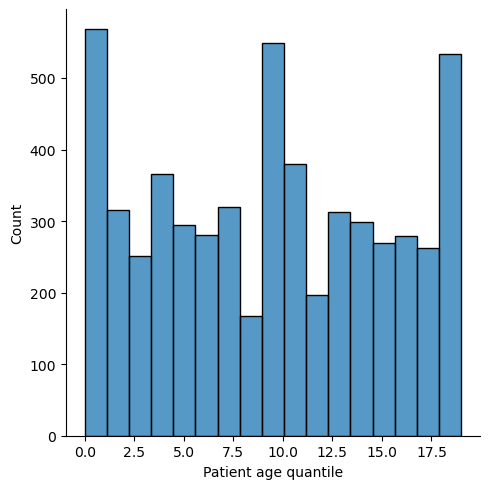

In [31]:
sns.displot(df['Patient age quantile'])

#### Variables qualitatives

In [35]:
for col in df.select_dtypes('object') : 
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

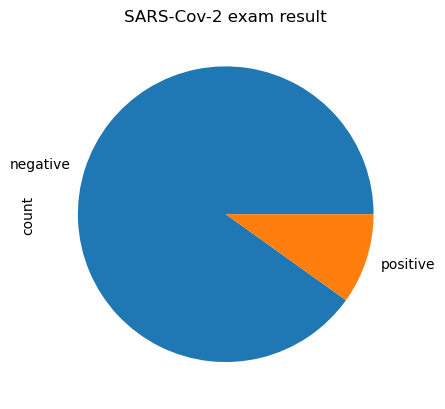

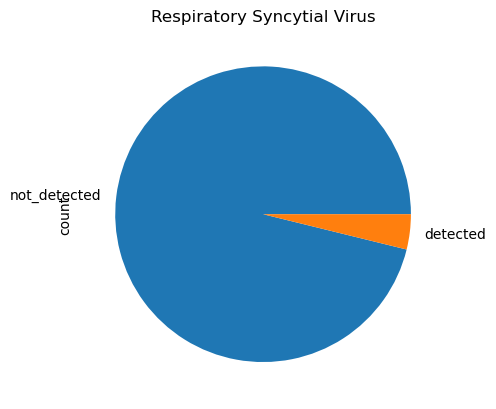

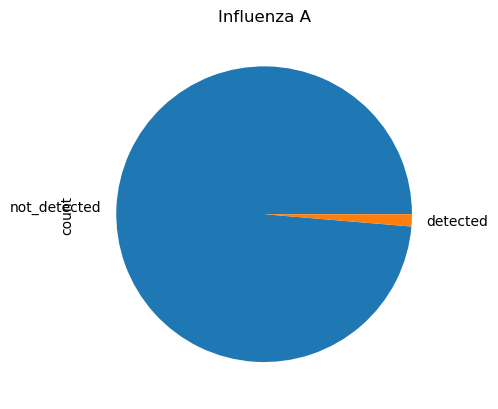

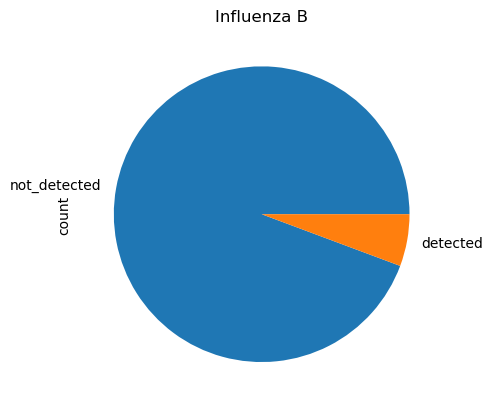

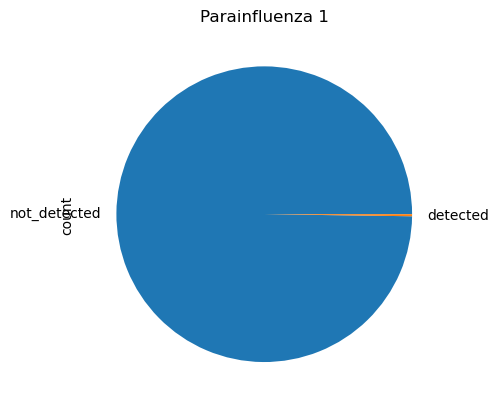

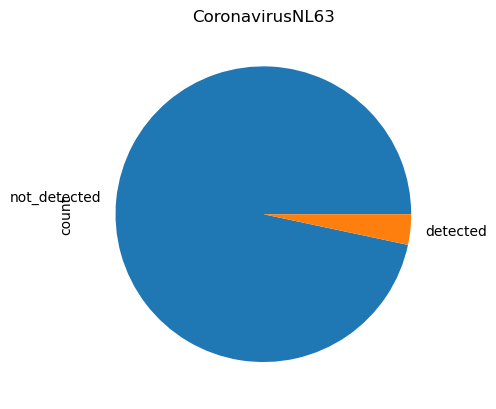

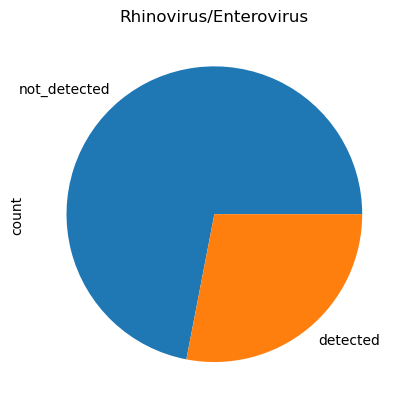

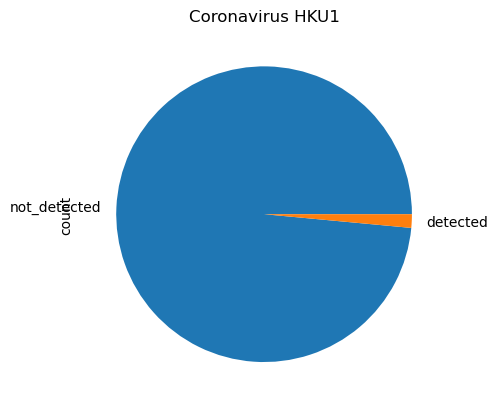

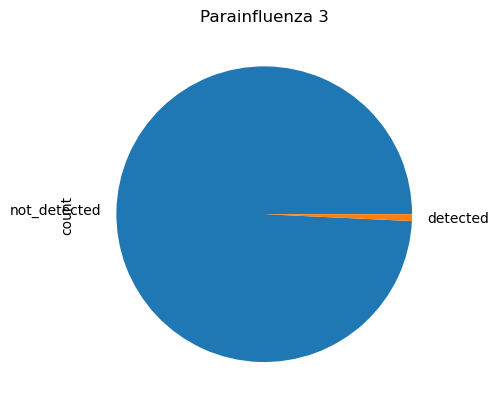

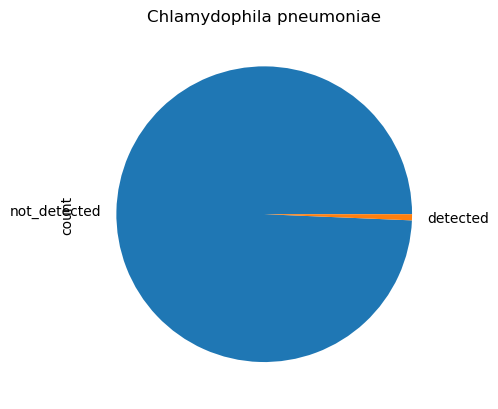

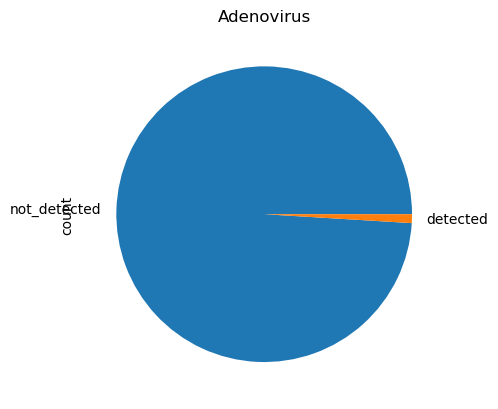

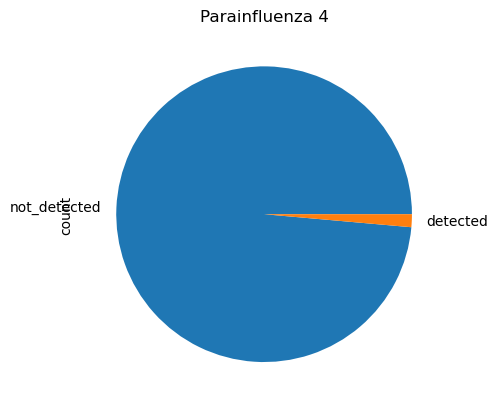

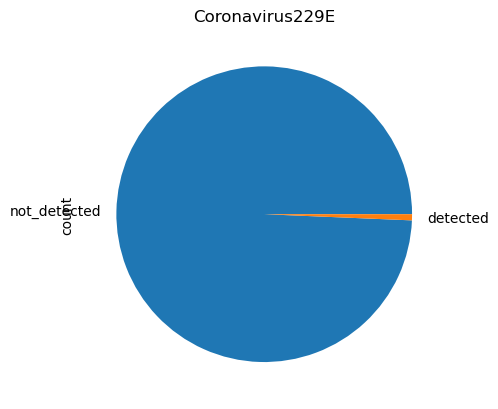

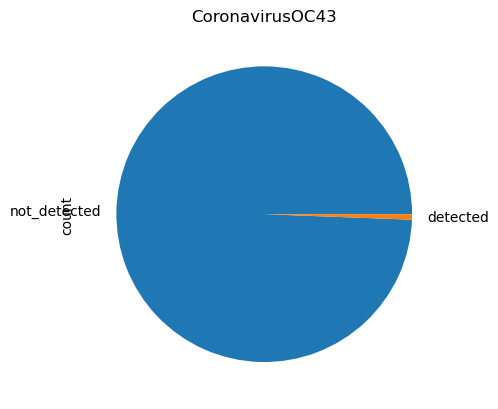

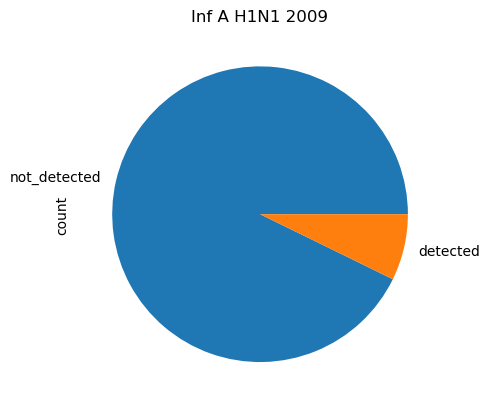

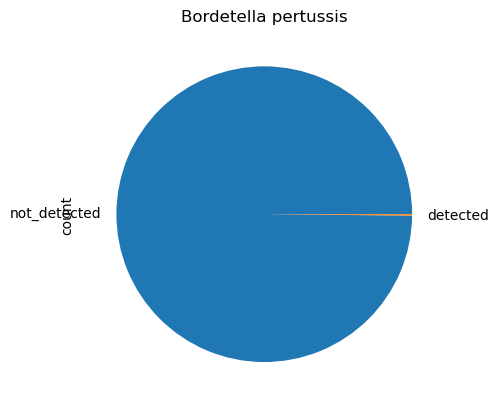

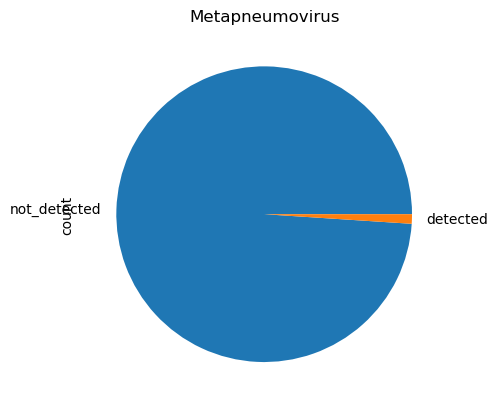

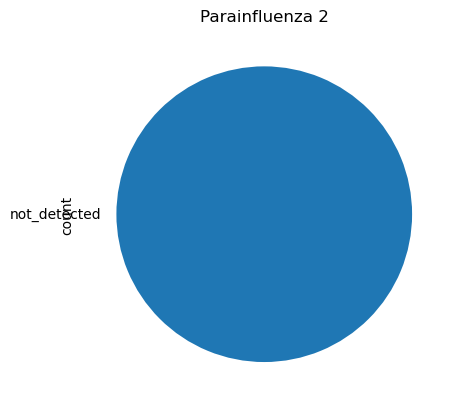

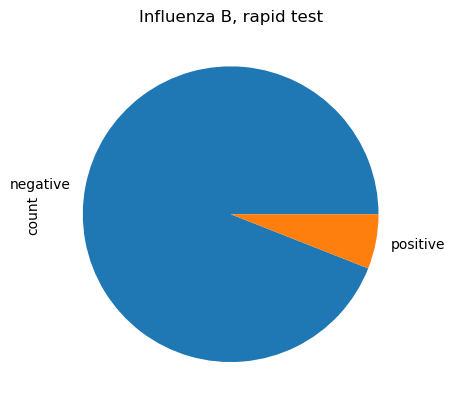

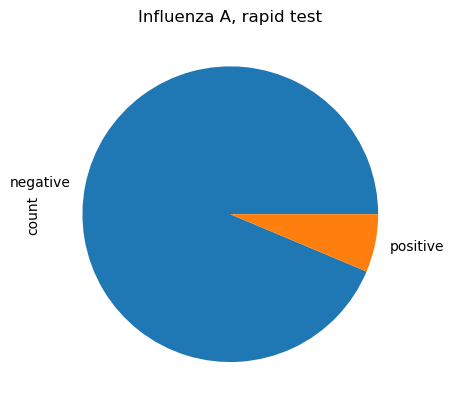

In [39]:
for col in df.select_dtypes('object') : 
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)
